In [253]:
from PIL import Image
import datetime
import time
from datetime import timedelta
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords
from krwordrank.sentence import summarize_with_sentences

# 대선후보별 키워드 추출

In [254]:
df = pd.read_csv('data/YoonSukYeol_df.csv', index_col=0).reset_index()
df

,Comment,is2030
0,재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만 오뉴월 여자의 한 서리 않맞으...,1
1,욜씸히 경험하세용나라의미래를위하여,1
2,바르고 참신 ㅋㅋㅋ 개싸가지가 맞을걸,1
3,세상을 보는 힘을 역사공부를 더 하고 나대는것이 김의원에게 도움되지 않을까나,1
4,어준시레기공장에서 인터뷰 질 떨어진다 그렇게도 언론에 나오고 싶으면 차라리 유튜브라...,1
...,...,...
11424,등치값을 충분히 하시는분같으네요저도두분과 똑같은 생각을 가지고있었지만 현재 국민...,1
11425,나는옛날부터유튜브에문이바구는꺼꾸로듯고행동해야손해안간다고열나게말했읍니다부디꺼꾸로들어셔요,1
11426,보수들 현실에서 이것저것다따져서 어저겠단말인가 과거에얽매이는것보다더우매한...,1
11427,보수야 속지 맙시다우리 정신 차립시다,1


## 분리된 first, second, third, fourth 각각 워드클라우드 추출

In [255]:
# li = [first, second, third, fourth]
# 2030이 Comment에 있는 경우만 추출
# df = fourth
df = df[['Comment']]
df

,Comment
0,재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만 오뉴월 여자의 한 서리 않맞으...
1,욜씸히 경험하세용나라의미래를위하여
2,바르고 참신 ㅋㅋㅋ 개싸가지가 맞을걸
3,세상을 보는 힘을 역사공부를 더 하고 나대는것이 김의원에게 도움되지 않을까나
4,어준시레기공장에서 인터뷰 질 떨어진다 그렇게도 언론에 나오고 싶으면 차라리 유튜브라...
...,...
11424,등치값을 충분히 하시는분같으네요저도두분과 똑같은 생각을 가지고있었지만 현재 국민...
11425,나는옛날부터유튜브에문이바구는꺼꾸로듯고행동해야손해안간다고열나게말했읍니다부디꺼꾸로들어셔요
11426,보수들 현실에서 이것저것다따져서 어저겠단말인가 과거에얽매이는것보다더우매한...
11427,보수야 속지 맙시다우리 정신 차립시다


In [256]:
# df에 null값이 있는 지 확인
df.isna().sum()

Comment    0
dtype: int64

In [257]:
# df의 null값 제거
df.dropna(axis=0,inplace=True)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [258]:
# 결측치 잘 제거되었는지 확인
df.isna().sum()

Comment    0
dtype: int64

In [259]:
# [:574]부터 오류남 -> 이유&해결방안 찾기
texts = df['Comment'].tolist()
texts

['재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만 오뉴월 여자의 한 서리 않맞으려면 그 이전에 부선이 부터 부릎꿇고 살살빌어 달래줘야 한다',
 '욜씸히 경험하세용나라의미래를위하여',
 '바르고 참신 ㅋㅋㅋ 개싸가지가 맞을걸',
 '세상을 보는 힘을 역사공부를 더 하고 나대는것이 김의원에게 도움되지 않을까나',
 '어준시레기공장에서 인터뷰 질 떨어진다 그렇게도 언론에 나오고 싶으면 차라리 유튜브라도 하든가',
 '언론들은 왜 이런 구상유취한 애를 자꾸 띄우나',
 '비교를 해도 그렇게하냐 쌍',
 '이준석이 할말 잘하는구만 문재인 잡으려면 강하게 나가야지 뒤에서 찔찔거리고 있으면 누가 믿고 따르겠냐 나는 이준석의 새바람에 탔다 늙어서 이준석이 만드는 새바람에 못 따라가겠는 사람은 뒤에서 서포트나해라',
 '너무 나가시는건 아니한만 못하다',
 '어린촐랑아 너도 막말부터 배우냐깜량도 안되는것이 너무 촛삭거리네',
 '희망사항 이겟지 ㅋㅋ',
 '김종인 전 위원장을 먹던밥에 재 뿌리고 나갔다고 욕들하지만 난 그렇게 생각지 않는다 과정없는 결과는 절대로 있을수 없기 때문에 선재공격한 투수가 너무 심했기 때문으로 알고있다 좌우를 떠나서 나라가 잘되길 바라는 마음은 김위원장도 크리라 생각한다 마음에 안든다고 욕부터하지말고 멀리보는 혜안을 갖자는게 내 지론이다',
 '손주나 보며 지내시지',
 '목만 제대로 늘이고 그대려라  목만 제대로 늘이고 기다려라로 고칩니다',
 '김 교수 말씀 맞는말씀이다 대선 끝난담에 복귀해라',
 '국힘당에 사태 제대로보고 할말 하는 의원들이 없으니 당근 즉각 모셔라',
 '정권 바꾸려면 힘을 모을 생각을 해라 안되는걸 자꾸 한다고 뭐가 나아지나',
 '제발 면상좀 안보게 꺼져주세요 누가 당신을 찍는다고 아직도 정신못차렸네',
 '윤씨는 벌써 나섰는데 뭘 함께야 ㅋ 묻어갈라고 하지마',
 '이분은 한는말마다 머이딴식인지 머리가 이상한거아니여 헛소린 고마하고다니지 정권에도움안돼고 민폐인거모르는지 국민보고 바보라고 하는거랑 똑같레',
 '

In [260]:
texts

['재명이는 민주당 간판으로 출사표를 던지기도 어렵겠지만 오뉴월 여자의 한 서리 않맞으려면 그 이전에 부선이 부터 부릎꿇고 살살빌어 달래줘야 한다',
 '욜씸히 경험하세용나라의미래를위하여',
 '바르고 참신 ㅋㅋㅋ 개싸가지가 맞을걸',
 '세상을 보는 힘을 역사공부를 더 하고 나대는것이 김의원에게 도움되지 않을까나',
 '어준시레기공장에서 인터뷰 질 떨어진다 그렇게도 언론에 나오고 싶으면 차라리 유튜브라도 하든가',
 '언론들은 왜 이런 구상유취한 애를 자꾸 띄우나',
 '비교를 해도 그렇게하냐 쌍',
 '이준석이 할말 잘하는구만 문재인 잡으려면 강하게 나가야지 뒤에서 찔찔거리고 있으면 누가 믿고 따르겠냐 나는 이준석의 새바람에 탔다 늙어서 이준석이 만드는 새바람에 못 따라가겠는 사람은 뒤에서 서포트나해라',
 '너무 나가시는건 아니한만 못하다',
 '어린촐랑아 너도 막말부터 배우냐깜량도 안되는것이 너무 촛삭거리네',
 '희망사항 이겟지 ㅋㅋ',
 '김종인 전 위원장을 먹던밥에 재 뿌리고 나갔다고 욕들하지만 난 그렇게 생각지 않는다 과정없는 결과는 절대로 있을수 없기 때문에 선재공격한 투수가 너무 심했기 때문으로 알고있다 좌우를 떠나서 나라가 잘되길 바라는 마음은 김위원장도 크리라 생각한다 마음에 안든다고 욕부터하지말고 멀리보는 혜안을 갖자는게 내 지론이다',
 '손주나 보며 지내시지',
 '목만 제대로 늘이고 그대려라  목만 제대로 늘이고 기다려라로 고칩니다',
 '김 교수 말씀 맞는말씀이다 대선 끝난담에 복귀해라',
 '국힘당에 사태 제대로보고 할말 하는 의원들이 없으니 당근 즉각 모셔라',
 '정권 바꾸려면 힘을 모을 생각을 해라 안되는걸 자꾸 한다고 뭐가 나아지나',
 '제발 면상좀 안보게 꺼져주세요 누가 당신을 찍는다고 아직도 정신못차렸네',
 '윤씨는 벌써 나섰는데 뭘 함께야 ㅋ 묻어갈라고 하지마',
 '이분은 한는말마다 머이딴식인지 머리가 이상한거아니여 헛소린 고마하고다니지 정권에도움안돼고 민폐인거모르는지 국민보고 바보라고 하는거랑 똑같레',
 '

In [261]:
# 불용어 제거
with open('data/stopwords.txt') as fp :
    stopwords = fp.readlines()

stopwords = set([x.strip() for x in stopwords])

In [262]:
keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 14316
done = 10 Early stopped.


In [263]:
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
passwords

{'나라': 14.445779651398915,
 '감사': 14.175905180277214,
 '언론': 14.066183597374588,
 '지지': 13.840348368111163,
 '사람': 13.477286837379292,
 '방송': 13.42613628242433,
 '좋은': 13.182963506843505,
 '국민': 12.33448855339112,
 '부동산': 12.095487257875511,
 '생각': 11.892543644857408,
 '교회': 10.50036598409315,
 '많이': 9.999667866754878,
 '개혁': 8.978621759918235,
 '보수': 8.966065435294203,
 '검찰': 7.814914846515263,
 '정신': 7.784668919400218,
 '정치': 7.589429627104307,
 '화이팅': 7.566325016766341,
 '조국': 7.242792519806261,
 '말씀': 7.226436968856813,
 '정보': 7.168617201350251,
 '응원': 7.110610323742744,
 '정부': 7.027316822181267,
 '진보': 6.944792969526912,
 '뚫어': 6.921832837521245,
 '정권': 6.564523971880768,
 '오늘도': 6.4668695471766116,
 '대선': 6.445083002435937,
 '정책': 5.9454645482453,
 '영상': 5.810690182069462,
 '코로나': 5.591568360022153,
 '수고': 5.490534590877679,
 '서민': 5.301514895405957,
 '문제': 5.192915722627716,
 '대깨문': 5.156579703779488,
 '포교': 5.153979088473164,
 '이준석': 4.956328958888863}

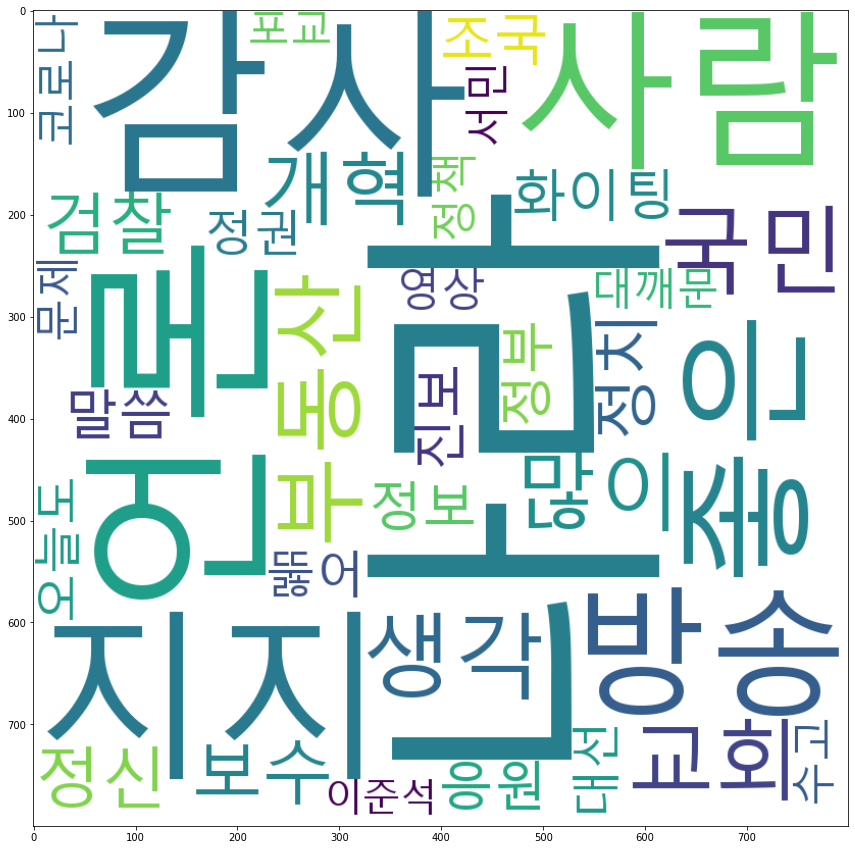

In [264]:
import random

# 워드클라우드 색상 변경 함수 (리턴 위 : 보라색, 리턴 아래 : 회색 계열)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))
    #return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)
    
# 폰트 패스 설정
font_path = "c:/Windows/Fonts/malgun.ttf"

# 바탕화면 지도 모양으로 만들기 위해 지도 이미지 들고오기
image_map = np.array(Image.open('data/map.png'))

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    #mask=image_map,
    background_color="white",
    # color_func = color_func,
    #colormap = 'PRGn'
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

fig = plt.figure(figsize=(15, 15))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

# wordcloud 불용어 있으면 불용어 사전에 추가하기

In [265]:
# f = open("data/stopwords.txt",'a')
# for t in stopwords:
#     f.write(t+'\n')
# f.close()

In [266]:
# f = open("data/stopwords.txt",'a')
# f.write('ㅎㅎ\n')
# f.write('못하\n')
# f.write('됩니다.\n')
# f.write('합니다.\n')
# f.write('것이\n')
# f.write('입니다.\n')
# f.write('있습니다.\n')
# f.write('이렇게.\n')
# f.write('한다.\n')
# f.write('겁니다.\n')
# f.write('민주당\n')
# f.write('오세훈\n')
# f.write('문재인\n')
# f.write('것을\n')
# f.write('이렇게\n')
# f.write('너무\n')
# f.write('가지고\n')
# f.write('ㅋㅋ\n')
# f.write('크크크\n')
# f.write('대한\n')
# f.write('지금\n')
# f.close()

# 핵심 문장 추출

In [286]:
# 불용어 처리 O 버전
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1 # 너무 길거나 짧은 문장 제거

stopwords = stopwords
num_keywords = 100
num_keysents = 11

# 다양한 조건 추가 (불용어 처리 등등)
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.9,
    num_keywords=num_keywords,
    num_keysents=num_keysents,
    verbose=False
)
print(sents,keywords)
print(len(keywords))

['눈뜨면 검찰개혁  언론개혁 논하기전에정치인개개인과 정치부터개혁의대상이다여야 진보 보수를떠나국민을바로알고국민을섬기는자세를보여라', '좋아하는 사람들좋은 사람들이라 영상 보는데생각 이상으로 내용이 알차고 기획도 잘 만든거 같네요빠지지 않고 볼께요', '내가 이넘은 할머니가 나라을 걱정할줄은 정말 몰라습니다 김선생님의 방송을 보면서 이렇게 바른방송에 하루을보는 낙입니다감사합니다', '염치도 없는 문정권 하수인들 정의도 공정도 헌신짝 처럼 내팽개치고는 무슨 할말이 있다고 입은 살아가지고 대깨문 빼고는 니네들 말에 공감 안한다', '이재정의원님 늘 소신 사이다발언 최고입니다 늘 화이팅 응원합니다', '추미애와 조국  조민 정경심이 흐름을 바꾸었고 부동산 정책에 젊은이들이 분노했다', '오늘도 김광일쇼 잘 경청했습니다명확하고도 똑떨어지는 판단과 발음잘 알겠습니다 수고 많이 해주시기 바랍니다사랑합니다', '민주당 빨리빨리 정신차려 고국힘당 에 재발  밀리지말고', '대선 후보로는 안나온다는 말씀이네요 누구를 밀어줄지 기대됩니다', '이번 시장선거 결과로  똥들이 미친듯이 설치고 기어나오네 여려분 큰일 하셨네요', '서민선생님서민들 마음을 시원하게 뻥 뚫어주시는 사이다'] {'나라': 14.445779651398915, '감사': 14.175905180277214, '언론': 14.066183597374588, '지지': 13.840348368111163, '사람': 13.477286837379292, '방송': 13.42613628242433, '좋은': 13.182963506843505, '국민': 12.33448855339112, '부동산': 12.095487257875511, '생각': 11.892543644857408, '교회': 10.50036598409315, '많이': 9.999667866754878, '개혁': 8.978621759918235, '보수': 8.966065435294203, '검찰': 7.814914846515263, '정신': 7.7846

In [287]:
print(f'핵심 키워드 개수: {len(keywords)}')
print(f'핵심 키워드 : {keywords}')

핵심 키워드 개수: 100
핵심 키워드 : {'나라': 14.445779651398915, '감사': 14.175905180277214, '언론': 14.066183597374588, '지지': 13.840348368111163, '사람': 13.477286837379292, '방송': 13.42613628242433, '좋은': 13.182963506843505, '국민': 12.33448855339112, '부동산': 12.095487257875511, '생각': 11.892543644857408, '교회': 10.50036598409315, '많이': 9.999667866754878, '개혁': 8.978621759918235, '보수': 8.966065435294203, '검찰': 7.814914846515263, '정신': 7.784668919400218, '정치': 7.589429627104307, '화이팅': 7.566325016766341, '조국': 7.242792519806261, '말씀': 7.226436968856813, '정보': 7.168617201350251, '응원': 7.110610323742744, '정부': 7.027316822181267, '진보': 6.944792969526912, '뚫어': 6.921832837521245, '정권': 6.564523971880768, '오늘도': 6.4668695471766116, '대선': 6.445083002435937, '정책': 5.9454645482453, '영상': 5.810690182069462, '코로나': 5.591568360022153, '수고': 5.490534590877679, '서민': 5.301514895405957, '문제': 5.192915722627716, '대깨문': 5.156579703779488, '포교': 5.153979088473164, '이준석': 4.956328958888863, '코드': 4.8853273468572915, '서울': 4.867

In [288]:
# 핵심 키워드 리스트로 저장
keywords_list = []
for k,v in keywords.items():
    keywords_list.append(k)
keywords_list = keywords_list
keywords_list

['나라',
 '감사',
 '언론',
 '지지',
 '사람',
 '방송',
 '좋은',
 '국민',
 '부동산',
 '생각',
 '교회',
 '많이',
 '개혁',
 '보수',
 '검찰',
 '정신',
 '정치',
 '화이팅',
 '조국',
 '말씀',
 '정보',
 '응원',
 '정부',
 '진보',
 '뚫어',
 '정권',
 '오늘도',
 '대선',
 '정책',
 '영상',
 '코로나',
 '수고',
 '서민',
 '문제',
 '대깨문',
 '포교',
 '이준석',
 '코드',
 '서울',
 '말고',
 '선거',
 '말이',
 '먹아지를',
 '너네',
 '뉴스',
 '니네',
 '이단',
 '미친',
 '니들',
 '이재정',
 '있습니',
 '의원',
 '담임',
 '빨리',
 '투표',
 '한국',
 '못한',
 '나오',
 '소리',
 '최고',
 '국회',
 '기대',
 '백신',
 '만세',
 '국힘',
 '책임',
 '이유',
 '열심히',
 '위한',
 '알고',
 '시작',
 'ㅠㅠ',
 '홧팅',
 '이해',
 '적폐',
 '미국',
 '공감',
 '사실',
 '결과',
 '공무원',
 '안되',
 '말을',
 '중국',
 '그만',
 '잘못',
 '그러',
 '다들',
 '조사',
 '투기',
 '세대',
 '공정',
 '뭐가',
 '내용',
 '처럼',
 '김광일',
 '시원',
 '저도',
 '상황',
 '정의',
 '여론']

In [289]:
print(f'핵심 문장 개수: {len(sents)}')
print(f'핵심 문장 : {sents}')

핵심 문장 개수: 11
핵심 문장 : ['눈뜨면 검찰개혁  언론개혁 논하기전에정치인개개인과 정치부터개혁의대상이다여야 진보 보수를떠나국민을바로알고국민을섬기는자세를보여라', '좋아하는 사람들좋은 사람들이라 영상 보는데생각 이상으로 내용이 알차고 기획도 잘 만든거 같네요빠지지 않고 볼께요', '내가 이넘은 할머니가 나라을 걱정할줄은 정말 몰라습니다 김선생님의 방송을 보면서 이렇게 바른방송에 하루을보는 낙입니다감사합니다', '염치도 없는 문정권 하수인들 정의도 공정도 헌신짝 처럼 내팽개치고는 무슨 할말이 있다고 입은 살아가지고 대깨문 빼고는 니네들 말에 공감 안한다', '이재정의원님 늘 소신 사이다발언 최고입니다 늘 화이팅 응원합니다', '추미애와 조국  조민 정경심이 흐름을 바꾸었고 부동산 정책에 젊은이들이 분노했다', '오늘도 김광일쇼 잘 경청했습니다명확하고도 똑떨어지는 판단과 발음잘 알겠습니다 수고 많이 해주시기 바랍니다사랑합니다', '민주당 빨리빨리 정신차려 고국힘당 에 재발  밀리지말고', '대선 후보로는 안나온다는 말씀이네요 누구를 밀어줄지 기대됩니다', '이번 시장선거 결과로  똥들이 미친듯이 설치고 기어나오네 여려분 큰일 하셨네요', '서민선생님서민들 마음을 시원하게 뻥 뚫어주시는 사이다']


# 추출한 핵심 키워드 저장

In [290]:
keyword = pd.DataFrame()
keyword['keyword'] = keywords_list
keyword

,keyword
0,나라
1,감사
2,언론
3,지지
4,사람
...,...
95,시원
96,저도
97,상황
98,정의


In [291]:
keyword.to_csv('data/keyword.csv',encoding='utf-8-sig')

# 추출한 핵심 문장 저장

In [296]:
sents[:2]+sents[3:]

['눈뜨면 검찰개혁  언론개혁 논하기전에정치인개개인과 정치부터개혁의대상이다여야 진보 보수를떠나국민을바로알고국민을섬기는자세를보여라',
 '좋아하는 사람들좋은 사람들이라 영상 보는데생각 이상으로 내용이 알차고 기획도 잘 만든거 같네요빠지지 않고 볼께요',
 '염치도 없는 문정권 하수인들 정의도 공정도 헌신짝 처럼 내팽개치고는 무슨 할말이 있다고 입은 살아가지고 대깨문 빼고는 니네들 말에 공감 안한다',
 '이재정의원님 늘 소신 사이다발언 최고입니다 늘 화이팅 응원합니다',
 '추미애와 조국  조민 정경심이 흐름을 바꾸었고 부동산 정책에 젊은이들이 분노했다',
 '오늘도 김광일쇼 잘 경청했습니다명확하고도 똑떨어지는 판단과 발음잘 알겠습니다 수고 많이 해주시기 바랍니다사랑합니다',
 '민주당 빨리빨리 정신차려 고국힘당 에 재발  밀리지말고',
 '대선 후보로는 안나온다는 말씀이네요 누구를 밀어줄지 기대됩니다',
 '이번 시장선거 결과로  똥들이 미친듯이 설치고 기어나오네 여려분 큰일 하셨네요',
 '서민선생님서민들 마음을 시원하게 뻥 뚫어주시는 사이다']

In [297]:
keysentence = pd.DataFrame()
keysentence['keysentence'] = sents[:2]+sents[3:]
keysentence

,keysentence
0,눈뜨면 검찰개혁 언론개혁 논하기전에정치인개개인과 정치부터개혁의대상이다여야 진보 보...
1,좋아하는 사람들좋은 사람들이라 영상 보는데생각 이상으로 내용이 알차고 기획도 잘 만...
2,염치도 없는 문정권 하수인들 정의도 공정도 헌신짝 처럼 내팽개치고는 무슨 할말이 있...
3,이재정의원님 늘 소신 사이다발언 최고입니다 늘 화이팅 응원합니다
4,추미애와 조국 조민 정경심이 흐름을 바꾸었고 부동산 정책에 젊은이들이 분노했다
5,오늘도 김광일쇼 잘 경청했습니다명확하고도 똑떨어지는 판단과 발음잘 알겠습니다 수고 ...
6,민주당 빨리빨리 정신차려 고국힘당 에 재발 밀리지말고
7,대선 후보로는 안나온다는 말씀이네요 누구를 밀어줄지 기대됩니다
8,이번 시장선거 결과로 똥들이 미친듯이 설치고 기어나오네 여려분 큰일 하셨네요
9,서민선생님서민들 마음을 시원하게 뻥 뚫어주시는 사이다


In [250]:
keysentence.to_csv('data/keysentence.csv',encoding='utf-8-sig')

# 추출한 핵심 키워드 & 문장 함께 저장

In [251]:
keyword_keysentence = pd.DataFrame()
keyword_keysentence['keyword'] = keywords_list[:len(sents)]
keyword_keysentence['keysentence'] = sents[:len(keyword)]
keyword_keysentence

,keyword,keysentence
0,나라,눈뜨면 검찰개혁 언론개혁 논하기전에정치인개개인과 정치부터개혁의대상이다여야 진보 보...
1,감사,좋아하는 사람들좋은 사람들이라 영상 보는데생각 이상으로 내용이 알차고 기획도 잘 만...
2,언론,내가 이넘은 할머니가 나라을 걱정할줄은 정말 몰라습니다 김선생님의 방송을 보면서 이...
3,지지,염치도 없는 문정권 하수인들 정의도 공정도 헌신짝 처럼 내팽개치고는 무슨 할말이 있...
4,사람,이재정의원님 늘 소신 사이다발언 최고입니다 늘 화이팅 응원합니다
5,방송,추미애와 조국 조민 정경심이 흐름을 바꾸었고 부동산 정책에 젊은이들이 분노했다
6,좋은,오늘도 김광일쇼 잘 경청했습니다명확하고도 똑떨어지는 판단과 발음잘 알겠습니다 수고 ...
7,국민,민주당 빨리빨리 정신차려 고국힘당 에 재발 밀리지말고
8,부동산,대선 후보로는 안나온다는 말씀이네요 누구를 밀어줄지 기대됩니다
9,생각,이번 시장선거 결과로 똥들이 미친듯이 설치고 기어나오네 여려분 큰일 하셨네요


In [29]:
keyword_keysentence.to_csv('data/keyword_keysentence.csv',encoding='utf-8-sig')